# Building / testing Clause Tree extractor

In [1]:
from tf.app import use
A = use('bhsa', hoist=globals())

In [27]:
def get_predecessors(clause_atom, api, start=True):
    """Retrieve all of a clause_atom's predecessors in BHSA tree"""
    E = api.E
    if not start:
        yield clause_atom
    mother = E.mother.f(clause_atom)
    if mother:
        yield from get_predecessors(mother[0], api, start=False)
        
def get_successors(clause_atom, api, start=True):
    """Retrieve all of a clause_atom's successors in BHSA tree"""
    E = api.E
    if not start:
        yield clause_atom
    children = E.mother.t(clause_atom)
    for child in children:
        yield from get_successors(child, api, start=False)

In [28]:
query = '''

c1:clause
c2:clause
c3:clause


c1 <mother- c2
c1 <mother- c3
c1 
c2 < c3

'''

search = A.search(query)

  0.22s 835 results


In [29]:
A.show(search[:1], withNodes=True) # hiddenTypes={})

In [30]:
list(
    get_successors(427791, A.api)
)

[427792, 427793, 427794]

In [31]:
E.mother.t(427791)

(427792, 427793)

In [32]:
E.mother.t(427792)

()

In [33]:
E.mother.t(427793)

(427794,)

In [34]:
E.mother.t(427794)

()

## Apply to Whole HB and See Results

In [35]:
import pandas as pd

In [49]:
dataset = []

for clause in F.otype.s('clause_atom'):
    n_successors = len(list(get_successors(clause, A.api)))
    dataset.append({'node': clause, 'n_succ': n_successors})
    
df = pd.DataFrame(dataset)

In [50]:
df.shape

(90688, 2)

In [51]:
df.head()

,node,n_succ
0,515674,133
1,515675,2
2,515676,1
3,515677,0
4,515678,129


In [54]:
nsucc_ct = df.n_succ.value_counts()

nsucc_ct.head(20)

0     35453
1     14499
2      7620
3      5152
4      3502
5      2687
6      2056
7      1676
8      1340
9      1153
10      929
11      886
12      773
13      707
14      622
15      566
16      487
17      453
18      412
19      384
Name: n_succ, dtype: int64

<AxesSubplot:>

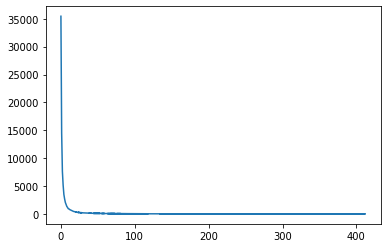

In [55]:
nsucc_ct.plot()